In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Tahap 1: Pengunduhan dan Ekstraksi Data

# URL dataset MovieLens (Small)
movielens_url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
# Nama file zip setelah diunduh
zip_file_name = "ml-latest-small.zip"
# Direktori tempat data akan diekstrak
data_dir = Path("./ml-latest-small")

In [3]:
# Mengunduh dataset
print(f"Mengunduh dataset dari {movielens_url}")
!wget -nc {movielens_url} -O {zip_file_name} # -nc (no-clobber) agar tidak menimpa jika sudah ada
print("Pengunduhan selesai.")

Mengunduh dataset dari http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
--2025-05-24 14:04:41--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.47MB/s    in 0.6s    

2025-05-24 14:04:42 (1.47 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Pengunduhan selesai.


In [4]:
# Mengekstrak file zip
if not data_dir.exists():
    print(f"Mengekstrak {zip_file_name}...")
    with ZipFile(zip_file_name, "r") as zip_ref:
        zip_ref.extractall(data_dir)
    print("Ekstraksi selesai.")
else:
    print(f"Direktori {data_dir} sudah ada. Melanjutkan tanpa ekstraksi.")

Mengekstrak ml-latest-small.zip...
Ekstraksi selesai.


In [5]:
# Import library yang mungkin belum diimport di cell sebelumnya, agar setiap cell mandiri
import pandas as pd
import numpy as np
from pathlib import Path

# Direktori tempat data diekstrak (sesuaikan jika berbeda)
data_dir = Path("./ml-latest-small")


In [6]:
# 2. Pemuatan dan Eksplorasi Data Awal
# Memuat dataset
ratings_df = pd.read_csv(data_dir / "ml-latest-small/ratings.csv")
movies_df = pd.read_csv(data_dir / "ml-latest-small/movies.csv")

Lihat 5 Baris Pertama ratings_df

In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Lihat 5 Baris Pertama movies_df

In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Informasi Umum ratings_df

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Statistik Rating

In [ ]:
{
    'Jumlah unique userId': ratings_df['userId'].nunique(),
    'Jumlah unique movieId': ratings_df['movieId'].nunique(),
    'Jumlah total rating': len(ratings_df),
    'Statistik rating': ratings_df['rating'].describe()
}

{'Jumlah unique userId': 610,
 'Jumlah unique movieId': 9724,
 'Jumlah total rating': 100836,
 'Statistik rating': count    100836.000000
 mean          3.501557
 std           1.042529
 min           0.500000
 25%           3.000000
 50%           3.500000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64}

 Informasi Umum movies_df

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Eksplorasi Genre Film

In [ ]:
{
    'Jumlah unique movieId': movies_df['movieId'].nunique(),
    'Jumlah unique genres': movies_df['genres'].nunique(),
    'Contoh genres': movies_df['genres'].unique()[:5]
}

{'Jumlah unique movieId': 9742,
 'Jumlah unique genres': 951,
 'Contoh genres': array(['Adventure|Animation|Children|Comedy|Fantasy',
        'Adventure|Children|Fantasy', 'Comedy|Romance',
        'Comedy|Drama|Romance', 'Comedy'], dtype=object)}

Distribusi Rating

In [ ]:
ratings_df['rating'].value_counts().sort_index()

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


Sampel Acak Movie dengan Genre

In [ ]:
movies_df.sample(5)

,movieId,title,genres
4845,7238,Ashes and Diamonds (Popiól i diament) (1958),Drama|War
4980,7636,Raising Cain (1992),Horror|Thriller
450,515,"Remains of the Day, The (1993)",Drama|Romance
8126,101362,Olympus Has Fallen (2013),Action|Thriller
5218,8512,Silent Movie (1976),Comedy


Gabungkan DataFrame

In [ ]:
all_movie_ratings = pd.merge(ratings_df, movies_df, on='movieId', how='left')


Tampilkan hasil penggabungan

In [ ]:
all_movie_ratings.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Informasi Data Gabungan

In [ ]:
all_movie_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


 Cek Missing Values

In [ ]:
all_movie_ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


Buat DataFrame untuk Content-Based Filtering

In [ ]:
content_features_df = movies_df.copy()


Tampilkan Data Content Features

In [ ]:
content_features_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Cek Jumlah Film Unik

In [ ]:
content_features_df['movieId'].nunique()

9742

Hapus film tanpa genre

In [ ]:
# Hapus film tanpa genre
content_features_df = content_features_df[content_features_df['genres'] != '(no genres listed)'].copy()

In [ ]:
content_features_df['movieId'].nunique()

9708

Filter Film yang Memiliki Genre

In [ ]:
movies_for_content = movies_df[movies_df['genres'] != '(no genres listed)'].copy()
movies_for_content = movies_for_content[['movieId', 'title', 'genres']]
movies_for_content.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Jumlah Film untuk Content-Based Filtering

In [ ]:
movies_for_content['movieId'].nunique()


9708

TF-IDF Vectorization dari Genre

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies_for_content['genres'])


Lihat Nama-Nama Fitur Genre

In [ ]:
tfidf.get_feature_names_out()


array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

Ukuran Matrix TF-IDF

In [ ]:
tfidf_matrix.shape


(9708, 21)

Hitung Cosine Similarity dan Bentuk Matrix

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_for_content['title'], columns=movies_for_content['title'])

Lihat Sebagian Matrix Similarity

In [ ]:
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)


title,"Boy and His Dog, A (1975)",The Spirit of Christmas (1995),Sunflower (Xiang ri kui) (2005),Steel Magnolias (1989),Prey for Rock & Roll (2003)
title,,,,,
"Italian Job, The (2003)",0.0,0.000000,0.0,0.0,0.0
The Little Prince (2015),0.0,0.648440,0.0,0.0,0.0
Surviving Christmas (2004),0.0,0.459887,0.0,0.0,0.0
"Impostors, The (1998)",0.0,0.459887,0.0,0.0,0.0
Puss in Boots (Nagagutsu o haita neko) (1969),0.0,0.542645,0.0,0.0,0.0


fungsi pencarian rekomendasi

In [ ]:
def get_recommendations(title, similarity_df, top_n=10):
    if title not in similarity_df.index:
        return f"Film '{title}' tidak ditemukan dalam dataset."
    scores = similarity_df[title].sort_values(ascending=False)
    recommended = scores.iloc[1:top_n+1].index.tolist()
    return recommended


In [ ]:
get_recommendations("Toy Story (1995)", cosine_sim_df)

['Turbo (2013)',
 'Shrek the Third (2007)',
 'Antz (1998)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Toy Story 2 (1999)',
 'Wild, The (2006)',
 'Monsters, Inc. (2001)',
 'Tale of Despereaux, The (2008)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'The Good Dinosaur (2015)']

Model Development dengan Collaborative



 Persiapan Data & Encoding User-Movie

In [ ]:
df = ratings_df

user_ids = df['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

movie_ids = df['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

df['user'] = df['userId'].map(user_to_user_encoded)
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

num_users = len(user_to_user_encoded)
num_movies = len(movie_encoded_to_movie)
df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])
max_rating = max(df['rating'])


Split Data untuk Training dan Validasi

In [ ]:
df = df.sample(frac=1, random_state=42)

x = df[['user', 'movie']].values
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


Definisi Model RecommenderNet

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(num_movies, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        return tf.nn.sigmoid(dot_user_movie + user_bias + movie_bias)

Kompilasi & Training Model

In [ ]:
model = RecommenderNet(num_users, num_movies, 50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val)
)


Epoch 1/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.6598 - root_mean_squared_error: 0.2539 - val_loss: 0.6207 - val_root_mean_squared_error: 0.2151
Epoch 2/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.6168 - root_mean_squared_error: 0.2122 - val_loss: 0.6198 - val_root_mean_squared_error: 0.2137
Epoch 3/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.6097 - root_mean_squared_error: 0.2038 - val_loss: 0.6144 - val_root_mean_squared_error: 0.2081
Epoch 4/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.6079 - root_mean_squared_error: 0.2015 - val_loss: 0.6137 - val_root_mean_squared_error: 0.2074
Epoch 5/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.6090 - root_mean_squared_error: 0.2019 - val_loss: 0.6125 - val_root_mean_squared_error: 0.2060
Epoch 6/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.6078 - root_mean_squared_error: 0.2019 - val_loss: 0.6108 - val_root_mean_squared_error: 0.2039
Epoch 7/100
1261/1261 ━━

Visualisasi RMSE Training vs Validation

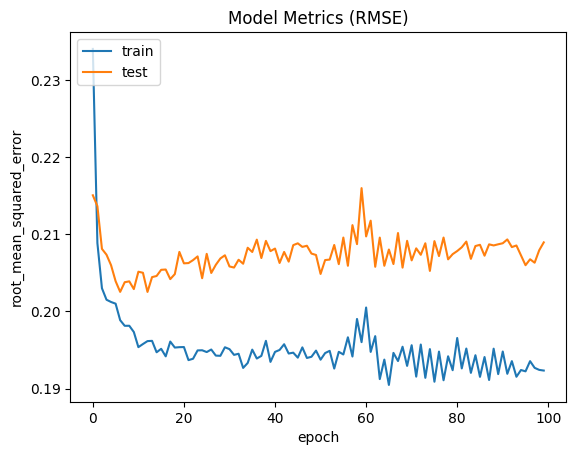

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics (RMSE)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Prediksi & Rekomendasi untuk Pengguna

In [ ]:
user_id = df.userId.sample(1).iloc[0]
movies_visited_by_user = df[df.userId == user_id]
movies_not_rated = movies_df[~movies_df['movieId'].isin(movies_visited_by_user.movieId.values)]['movieId']
movies_not_rated = list(set(movies_not_rated).intersection(set(movie_to_movie_encoded.keys())))
movies_not_rated_encoded = [[movie_to_movie_encoded.get(x)] for x in movies_not_rated]

user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_rated_encoded), movies_not_rated_encoded))

predictions = model.predict(user_movie_array).flatten()
top_ratings_indices = predictions.argsort()[-10:][::-1]
recommended_movie_ids = [movie_encoded_to_movie.get(movies_not_rated_encoded[x][0]) for x in top_ratings_indices]


290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Tampilkan Hasil Rekomendasi

In [ ]:
print(f'\n--- Rekomendasi untuk Pengguna: {user_id} ---')
print('Film dengan rating tertinggi yang diberikan pengguna:')
top_movies_user = movies_visited_by_user.sort_values(by='rating', ascending=False).head(5)
top_movies_user_info = pd.merge(top_movies_user, movies_df, on='movieId', how='left')
for row in top_movies_user_info.itertuples():
    print(f"- {row.title} (Rating: {row.rating}) [Genre: {row.genres}]")

print('\nTop 10 Rekomendasi Film Baru:')
recommended_movies_info = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movies_info.itertuples():
    print(f"- {row.title} [Genre: {row.genres}]")



--- Rekomendasi untuk Pengguna: 469 ---
Film dengan rating tertinggi yang diberikan pengguna:
- Time Bandits (1981) (Rating: 5.0) [Genre: Adventure|Comedy|Fantasy|Sci-Fi]
- Apartment, The (1960) (Rating: 5.0) [Genre: Comedy|Drama|Romance]
- Brazil (1985) (Rating: 5.0) [Genre: Fantasy|Sci-Fi]
- Apocalypse Now (1979) (Rating: 5.0) [Genre: Action|Drama|War]
- On the Waterfront (1954) (Rating: 5.0) [Genre: Crime|Drama]

Top 10 Rekomendasi Film Baru:
- Heidi Fleiss: Hollywood Madam (1995) [Genre: Documentary]
- Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) [Genre: Comedy]
- Stunt Man, The (1980) [Genre: Action|Adventure|Comedy|Drama|Romance|Thriller]
- Awful Truth, The (1937) [Genre: Comedy|Romance]
- Belle époque (1992) [Genre: Comedy|Romance]
- Adam's Rib (1949) [Genre: Comedy|Romance]
- Bad Boy Bubby (1993) [Genre: Drama]
- Enter the Void (2009) [Genre: Drama]
- Happy Feet Two (2011) [Genre: Animation|Children|Comedy|IMAX]
- Bill Hicks: Revelations (1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming movies_for_content is the intended DataFrame for content features
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=movies_for_content[['title', 'genres']], k=5, plot=True):
    if movie_title not in similarity_data.index:
        print(f"Film '{movie_title}' tidak ditemukan.")
        return pd.DataFrame()

    sim_scores = similarity_data[movie_title].sort_values(ascending=False)
    sim_scores = sim_scores.drop(movie_title, errors='ignore')
    top_titles = sim_scores.head(k).index
    top_scores = sim_scores.head(k).values

    recommendations = items[items['title'].isin(top_titles)].copy()
    recommendations['similarity'] = recommendations['title'].map(dict(zip(top_titles, top_scores)))
    recommendations = recommendations.sort_values(by='similarity', ascending=True)  # untuk barplot horizontal

    if plot:
        plt.figure(figsize=(8, 5))
        sns.barplot(x='similarity', y='title', data=recommendations, palette='viridis')
        plt.title(f"Top {k} Film Mirip dengan '{movie_title}' (Genre-Based)")
        plt.xlabel("Similarity Score")
        plt.ylabel("Film")
        plt.tight_layout()
        plt.show()

    return recommendations.reset_index(drop=True)

<ipython-input-54-dcc65fb26a17>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity', y='title', data=recommendations, palette='viridis')


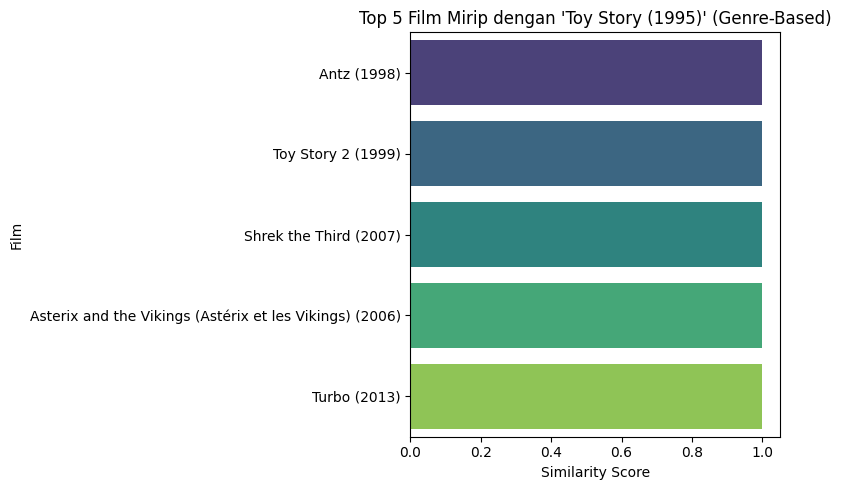

,title,genres,similarity
0,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,1.0
1,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.0
2,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,1.0
3,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy,1.0
4,Turbo (2013),Adventure|Animation|Children|Comedy|Fantasy,1.0


In [ ]:
movie_recommendations("Toy Story (1995)", k=5, plot=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def movie_recommendations(movie_title, similarity_data, items, k=5, plot=True):
    """
    Menampilkan top-k film paling mirip berdasarkan similarity matrix.

    Parameters:
    -----------
    movie_title : str
        Judul film yang ingin dicari kemiripannya.
    similarity_data : DataFrame
        DataFrame simetri berisi similarity antar film (judul sebagai index dan kolom).
    items : DataFrame
        DataFrame yang memuat kolom 'title' (dan 'genres' jika perlu).
    k : int
        Jumlah film teratas yang ditampilkan.
    plot : bool
        Jika True, tampilkan barplot visualisasi.

    Returns:
    --------
    DataFrame
        Top-k film dengan skor similarity tertinggi.
    """
    if movie_title not in similarity_data.index:
        print(f"⚠️ Film '{movie_title}' tidak ditemukan dalam similarity matrix.")
        return pd.DataFrame()

    # Urutkan similarity dan hilangkan film itu sendiri
    sim_scores = similarity_data[movie_title].sort_values(ascending=False).drop(movie_title, errors='ignore')
    top_titles = sim_scores.head(k).index
    top_scores = sim_scores.head(k).values

    # Ambil metadata film (jika tersedia)
    recommendations = items[items['title'].isin(top_titles)].copy()
    recommendations['similarity'] = recommendations['title'].map(dict(zip(top_titles, top_scores)))
    recommendations = recommendations.sort_values(by='similarity', ascending=True)  # Untuk horizontal barplot

    if plot:
        plt.figure(figsize=(8, 5))
        sns.barplot(x='similarity', y='title', data=recommendations, palette='viridis')
        plt.title(f"Top {k} Film Mirip dengan '{movie_title}'")
        plt.xlabel("Similarity Score")
        plt.ylabel("Film")
        plt.xlim(0, 1)
        plt.tight_layout()
        plt.show()

    return recommendations.reset_index(drop=True)


<ipython-input-56-941e0993ea3c>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity', y='title', data=recommendations, palette='viridis')


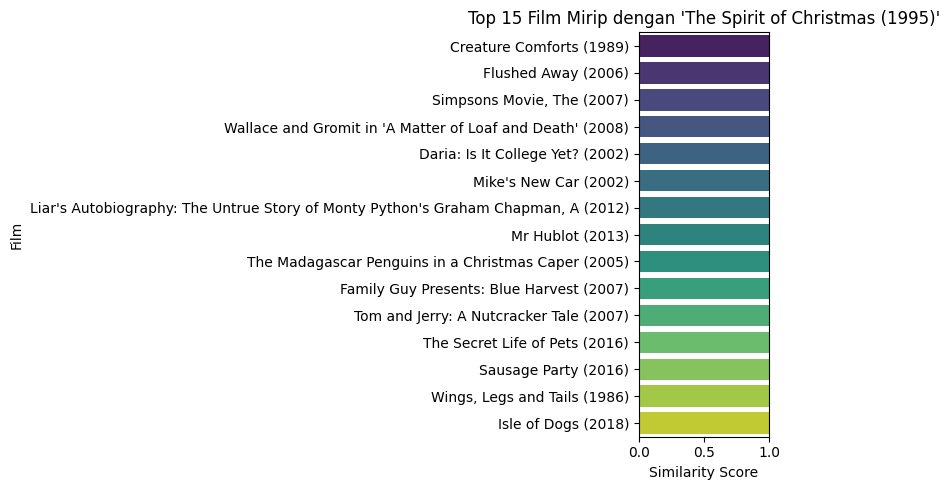

,title,genres,similarity
0,Creature Comforts (1989),Animation|Comedy,1.0
1,Flushed Away (2006),Animation|Comedy,1.0
2,"Simpsons Movie, The (2007)",Animation|Comedy,1.0
3,Wallace and Gromit in 'A Matter of Loaf and De...,Animation|Comedy,1.0
4,Daria: Is It College Yet? (2002),Animation|Comedy,1.0
5,Mike's New Car (2002),Animation|Comedy,1.0
6,Liar's Autobiography: The Untrue Story of Mont...,Animation|Comedy,1.0
7,Mr Hublot (2013),Animation|Comedy,1.0
8,The Madagascar Penguins in a Christmas Caper (...,Animation|Comedy,1.0
9,Family Guy Presents: Blue Harvest (2007),Animation|Comedy,1.0


In [ ]:
movie_recommendations(
    movie_title="The Spirit of Christmas (1995)",
    similarity_data=cosine_sim_df,
    items=movies_for_content[['title', 'genres']],
    k=15,
    plot=True
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gabungkan genre menjadi string (jika masih dipisahkan)
movies_for_content['genres_str'] = movies_for_content['genres'].fillna('').astype(str)

# TF-IDF vectorization
tfidf = TfidfVectorizer(token_pattern=r'[^|]+')
genre_matrix = tfidf.fit_transform(movies_for_content['genres_str'])

# Cosine similarity matrix
cosine_sim_df = pd.DataFrame(
    cosine_similarity(genre_matrix),
    index=movies_for_content['title'],
    columns=movies_for_content['title']
)


<ipython-input-56-941e0993ea3c>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity', y='title', data=recommendations, palette='viridis')


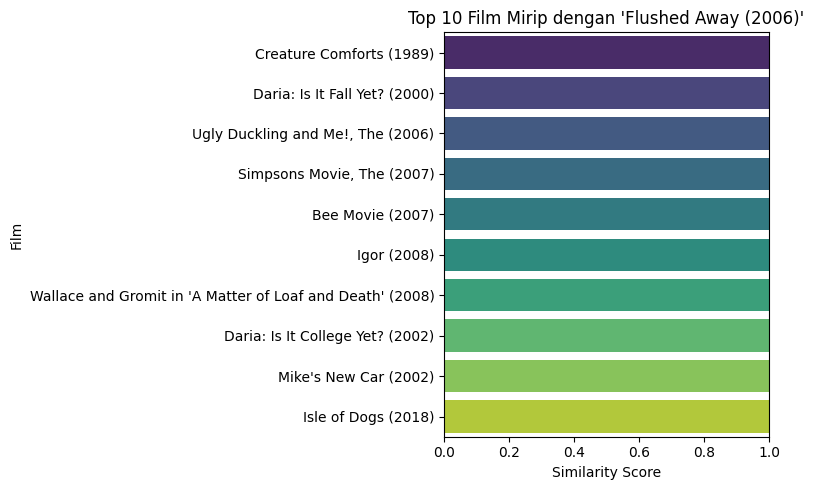

,title,genres,similarity
0,Creature Comforts (1989),Animation|Comedy,1.0
1,Daria: Is It Fall Yet? (2000),Animation|Comedy,1.0
2,"Ugly Duckling and Me!, The (2006)",Animation|Comedy,1.0
3,"Simpsons Movie, The (2007)",Animation|Comedy,1.0
4,Bee Movie (2007),Animation|Comedy,1.0
5,Igor (2008),Animation|Comedy,1.0
6,Wallace and Gromit in 'A Matter of Loaf and De...,Animation|Comedy,1.0
7,Daria: Is It College Yet? (2002),Animation|Comedy,1.0
8,Mike's New Car (2002),Animation|Comedy,1.0
9,Isle of Dogs (2018),Animation|Comedy,1.0


In [ ]:
movie_recommendations(
    movie_title="Flushed Away (2006)",
    similarity_data=cosine_sim_df,
    items=movies_for_content[['title', 'genres']],
    k=10
)
